### Import tools for Data Analysis

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
!ls

Group_5_18662_Project_Proposal.docx project_peai.ipynb
bayesian_model_AML.png              sampling.png
cmu-powerpoint-digitaltartan.potx   template-powerpoint
datasets                            template-powerpoint (1).zip


In [41]:
df = pd.read_csv('./datasets/AMLSG_Classification.txt', delimiter='\t')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1540 non-null   object
 1   NPM1                      1540 non-null   int64 
 2   CEBPA_bi                  1540 non-null   int64 
 3   inv16                     1540 non-null   int64 
 4   t15_17                    1540 non-null   int64 
 5   t8_21                     1540 non-null   int64 
 6   t6_9                      1540 non-null   int64 
 7   inv3                      1540 non-null   int64 
 8   t_MLL                     1540 non-null   int64 
 9   chromatin_spliceosome     1540 non-null   int64 
 10  p53_aneuploidy            1540 non-null   int64 
 11  IDH2_p172                 1540 non-null   int64 
 12  Ambiguous_classification  1540 non-null   int64 
 13  No_drivers                1540 non-null   int64 
 14  No_class                

In [43]:
df.dropna(axis=1, inplace=True)

### Features selection for bayesian Estimate

In [44]:
df

,ID,NPM1,CEBPA_bi,inv16,t15_17,t8_21,t6_9,inv3,t_MLL,chromatin_spliceosome,p53_aneuploidy,IDH2_p172,Ambiguous_classification,No_drivers,No_class,Overall_classification
0,PD10789a,0,0,0,0,1,0,0,0,0,0,0,0,0,0,t8_21
1,PD10790a,0,0,0,0,0,0,0,0,1,1,0,1,0,0,Ambiguous_classification
2,PD10792a,0,0,0,0,0,0,0,0,0,0,0,0,1,0,No_drivers
3,PD10793a,0,0,0,0,0,0,0,0,0,1,0,0,0,0,p53_aneuploidy
4,PD10794a,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NPM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,PD9381a,0,0,0,0,0,0,0,0,1,0,0,0,0,0,chromatin_spliceosome
1536,PD9383a,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NPM1
1537,PD9384a,0,0,0,0,0,0,0,0,1,0,0,0,0,0,chromatin_spliceosome
1538,PD9385a,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NPM1


### Import tools for Bayesian Estimate and Synthetic Data Sampling

In [45]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel

In [46]:
df.drop(columns=['ID', 'Overall_classification', 'Ambiguous_classification', 'No_drivers', 'No_class'], inplace=True)
df.iloc[0:100]

,NPM1,CEBPA_bi,inv16,t15_17,t8_21,t6_9,inv3,t_MLL,chromatin_spliceosome,p53_aneuploidy,IDH2_p172
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,1,0,0
97,0,0,0,0,0,0,0,0,1,0,0
98,0,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [48]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Initialize the HillClimbSearch object
hc = HillClimbSearch(df)

# Search for the best structure
best_model = hc.estimate()
best_model.edges()
# Create a BayesianNetwork object based on the learned structure
model = BayesianNetwork(best_model.edges())
copy_model = model.copy()
copy_model.nodes()
# # Fit the model to your data using Bayesian Estimator
model.fit(train_data)
model.get_cpds()

  0%|          | 0/1000000 [00:00<?, ?it/s]

[<TabularCPD representing P(CEBPA_bi:2) at 0x32f9d34f0>,
 <TabularCPD representing P(NPM1:2 | CEBPA_bi:2, IDH2_p172:2, chromatin_spliceosome:2, inv16:2, inv3:2, p53_aneuploidy:2, t15_17:2, t6_9:2, t8_21:2, t_MLL:2) at 0x32f9d91c0>,
 <TabularCPD representing P(chromatin_spliceosome:2 | CEBPA_bi:2, IDH2_p172:2, inv16:2, inv3:2, t15_17:2, t6_9:2, t8_21:2, t_MLL:2) at 0x32f9d91f0>,
 <TabularCPD representing P(p53_aneuploidy:2 | CEBPA_bi:2, IDH2_p172:2, chromatin_spliceosome:2, inv16:2, t15_17:2, t6_9:2, t8_21:2, t_MLL:2) at 0x32f9d9580>,
 <TabularCPD representing P(inv16:2) at 0x32f9d90a0>,
 <TabularCPD representing P(t15_17:2) at 0x32f9d9a00>,
 <TabularCPD representing P(t8_21:2) at 0x32f9d9ee0>,
 <TabularCPD representing P(t6_9:2) at 0x32f9d9100>,
 <TabularCPD representing P(inv3:2) at 0x32f9d90d0>,
 <TabularCPD representing P(t_MLL:2) at 0x32f9d9910>,
 <TabularCPD representing P(IDH2_p172:2) at 0x32f9d9640>]

In [49]:
# Evaluate model on test data
def evaluate_model(model, test_data):
    inference = VariableElimination(model)
    y_true = test_data['CEBPA_bi']  # Replace 'target_column' with the name of your target column
    y_pred = []
    for index, row in test_data.iterrows():
        # Perform inference to get predicted probabilities for the target variable
        inference_result = inference.map_query(variables=['CEBPA_bi'], evidence=row.drop('CEBPA_bi'))
        predicted_label = inference_result['CEBPA_bi']
        y_pred.append(predicted_label)
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

accuracy = evaluate_model(model, test_data)
print("Accuracy:", accuracy)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy: 0.961038961038961


In [50]:
copy_model.edges()

OutEdgeView([('CEBPA_bi', 'NPM1'), ('CEBPA_bi', 'chromatin_spliceosome'), ('CEBPA_bi', 'p53_aneuploidy'), ('chromatin_spliceosome', 'NPM1'), ('chromatin_spliceosome', 'p53_aneuploidy'), ('p53_aneuploidy', 'NPM1'), ('inv16', 'NPM1'), ('inv16', 'chromatin_spliceosome'), ('inv16', 'p53_aneuploidy'), ('t15_17', 'NPM1'), ('t15_17', 'chromatin_spliceosome'), ('t15_17', 'p53_aneuploidy'), ('t8_21', 'NPM1'), ('t8_21', 'chromatin_spliceosome'), ('t8_21', 'p53_aneuploidy'), ('t6_9', 'NPM1'), ('t6_9', 'chromatin_spliceosome'), ('t6_9', 'p53_aneuploidy'), ('inv3', 'NPM1'), ('inv3', 'chromatin_spliceosome'), ('t_MLL', 'NPM1'), ('t_MLL', 'chromatin_spliceosome'), ('t_MLL', 'p53_aneuploidy'), ('IDH2_p172', 'NPM1'), ('IDH2_p172', 'chromatin_spliceosome'), ('IDH2_p172', 'p53_aneuploidy')])

In [51]:
def has_cycle(graph):
    """
        Check a cycle on a graph
    """
    visited = set()
    stack = set()

    def dfs(node):
        if node in stack:
            return True
        if node in visited:
            return False

        visited.add(node)
        stack.add(node)

        for neighbor in graph.neighbors(node):
            if dfs(neighbor):
                return True

        stack.remove(node)
        return False

    for node in graph.nodes():
        if dfs(node):
            return True

    return False

# Assuming best_model is your directed graph
has_cycle(model)


False

In [52]:
### Drawing the Bayesian Network with Networkx

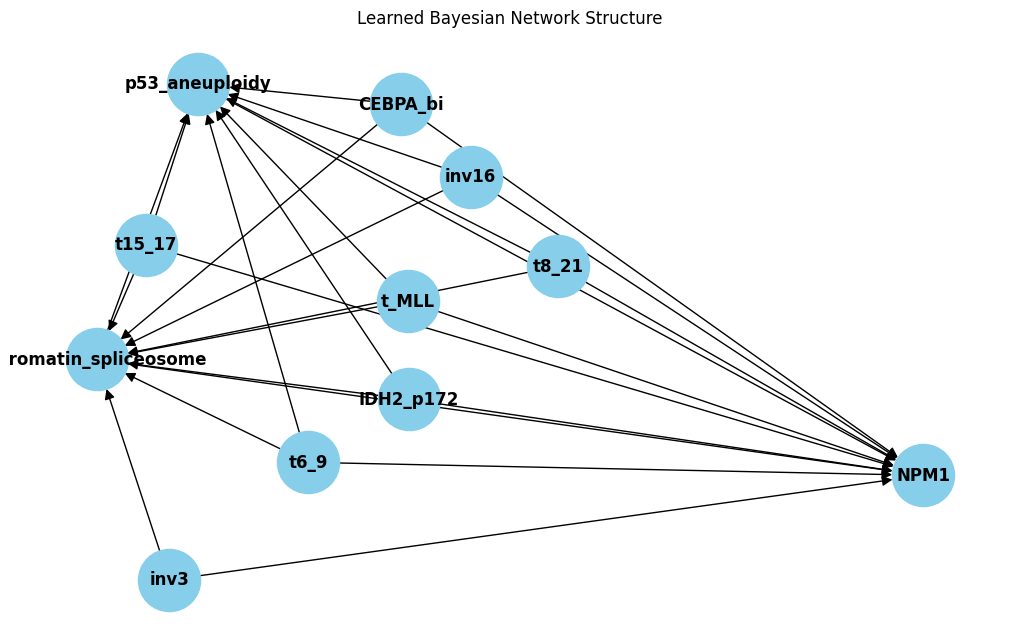

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph from the edges
G = nx.DiGraph(best_model.edges())

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=15)
plt.title("Learned Bayesian Network Structure")
plt.savefig("bayesian_model_AML.png")
plt.show()

In [54]:
### Syntheic Data Sampling from Bayesian Model distribution of AML Cancer

In [55]:
from pgmpy.sampling import BayesianModelSampling

# Create an instance of BayesianModelSampling with the learned Bayesian network model
model_sampler = BayesianModelSampling(model)

# Sample synthetic data from the Bayesian network
synthetic_data = model_sampler.forward_sample(size=1500)  # Change the size as needed

# Display the synthetic data
print(synthetic_data.head())

  0%|          | 0/11 [00:00<?, ?it/s]

   CEBPA_bi  NPM1  chromatin_spliceosome  p53_aneuploidy  inv16  t15_17  \
0         0     1                      0               0      0       0   
1         0     0                      0               1      0       0   
2         0     0                      0               0      0       0   
3         1     0                      0               0      0       0   
4         0     1                      0               0      0       0   

   t8_21  t6_9  inv3  t_MLL  IDH2_p172  
0      0     0     0      0          0  
1      0     0     0      0          0  
2      0     0     0      0          0  
3      0     0     0      0          0  
4      0     0     0      0          0  


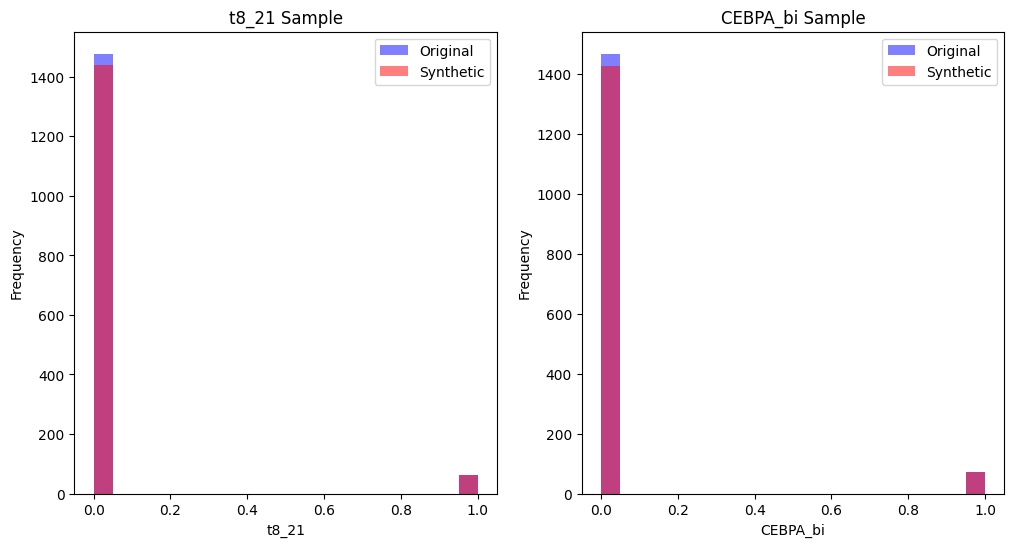

In [57]:
# Compute summary statistics
original_stats = df.describe()
synthetic_stats = synthetic_data.describe()

# Visualize distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['t8_21'], bins=20, color='blue', alpha=0.5, label='Original')
plt.hist(synthetic_data['t8_21'], bins=20, color='red', alpha=0.5, label='Synthetic')
plt.title('t8_21 Sample')
plt.xlabel('t8_21')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['CEBPA_bi'], bins=20, color='blue', alpha=0.5, label='Original')
plt.hist(synthetic_data['CEBPA_bi'], bins=20, color='red', alpha=0.5, label='Synthetic')
plt.title('CEBPA_bi Sample')
plt.xlabel('CEBPA_bi')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("sampling.png")
plt.show()